# AOS111 week 6
## Goals
- [ ] Create a Kmeans function using a simple blobs example from sklearn
- [ ] PART A: Create center locations
- [ ] PART B: Calculate distances
- [ ] PART C: Calculate new center locations
- [ ] PART D: Iterate until convergence

Created by Donglai Ma, October 2020

## K-means

We are going to implement the K-means algorithm from scratch. We will start with each step as a function to understand the algorithm and finally put all those function in a class which is your own kmeans algorithm class

### Prepare the dataset
We won't give the true label to the model, which is a unsupervised learning problem

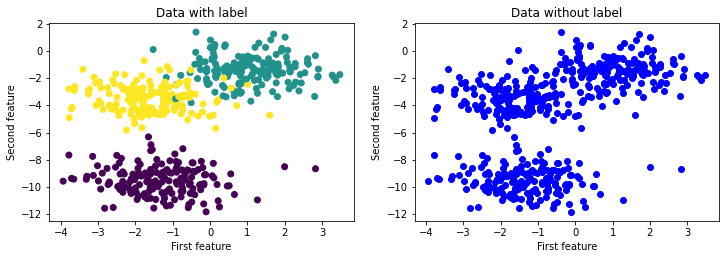

In [1]:
## Create dataset
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3, n_samples = 500,random_state=2)

fig = plt.figure(figsize=(12,8))
plt.subplot(221)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Data with label")
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.subplot(222)
plt.scatter(X[:,0], X[:,1], c='b')
plt.title("Data without label")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

### Step 1: select the random start location

The first step is to start by choosing the number of clusters that we want to group our data into. And we choose our K = 3, put down 3 centroids in random locations

[[-6.74706685e-01 -7.40251574e+00]
 [-8.71240131e-04 -1.15178259e+00]
 [-1.73521219e+00 -4.19069292e+00]]


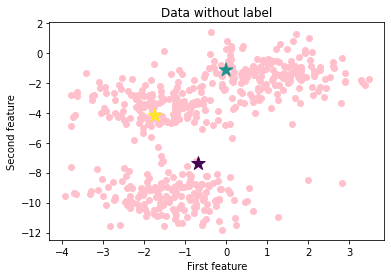

In [2]:
# IN-CLASS CODING PART A 
# Create center locations
# Your codes start here
import numpy as np
def startlocation(data,k):
    """
    Select the start cluster controid
    @ data: X
    @ k: cluster numbers
    
    return:
    @ centers: centers' locations
    """
    
    # Find the minimum and maximum values for each feature
    minima = data.min(axis=0)
    maxima = data.max(axis=0)
    
    feater_num = data.shape[1]
    
    # centres should be an array which shape is (k,features)
    #############################
    centers = 9999.9999
    #############################
    return centers


startc = startlocation(X,3)
print(startc)
plt.scatter(X[:,0], X[:,1], c='pink')
plt.title("Data without label")
plt.xlabel("First feature")
plt.ylabel("Second feature")


plt.scatter(startc[:,0], startc[:,1],s = 200, c=np.arange(len(startc)),marker='*')
plt.show()


### Step 2 : Compute distance (ICC1)
give each data sample a label based on its nearest cluster center


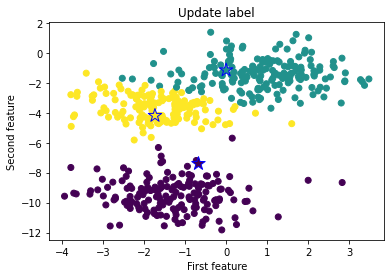

In [3]:
# IN-CLASS CODING: PART B
# Compute the distances
# Your codes start here
def get_label(data, centers,labels):
    """
    Get the label based on the nearest cluster center
    @ data: X
    @ centers: current cluster centers' loaction
    @ distances: Use a (sample_num, k) matrix to store the distance of each sample
    @ labels: Use a (sample_num, ) array to store the label of each sample
    return:
    @ labels : new label of X
    
    
    """
    # Compute the distance
    # Use a (sample_num, k) matrix to store the distance of each sample
    # Use a (sample_num, ) array to store the label of each sample
    # init the matrix
    distances = np.zeros((len(data), len(centers)))
    for center, i in zip(centers, np.arange(len(centers))):
        ############################################
        distances[:, i] = 9999.9999
        ###########################################
        
    labels = np.argmin(distances, axis=1)
    return labels



labels = np.zeros((len(X), 3))
labels = get_label(X, startc, labels)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Update label")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.scatter(startc[:, 0],
            startc[:, 1],
            s=200,
            c=np.arange(len(startc)),
            marker='*',
            edgecolors='b')
plt.show()

## Step 3 : Get new centers(ICC2)
Now for each group calculate the new centers


[[-1.32665443 -9.48117882]
 [ 0.87558201 -1.43193896]
 [-1.69795345 -3.68199871]]


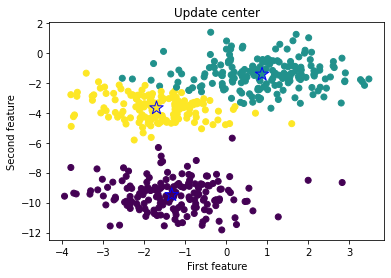

In [4]:
# IN-CLASS CODING: PART C
# Compute new center locations
# Your codes start here

def get_newcenter(data,k, labels,centers):
    """
    Get the new centers for each group
    return:
    @centers: new centers
    
    """
    new_centers = np.zeros(np.shape(centers))
    for i in np.arange(k):
        ###################################################
        new_center = 9999.9999
        ###################################################
        new_centers[i] = new_center
    return new_centers
new_centers = get_newcenter(X, 3,labels,startc)
print(new_centers)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Update center")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.scatter(new_centers[:, 0],
            new_centers[:, 1],
            s=200,
            c=np.arange(len(new_centers)),
            marker='*',
            edgecolors='b')
plt.show()

### Repeat until convergence(ICC3)
Now you have understand each step, lets put them together and repeat it until convergence


[[-2.20802234 -6.34093127]
 [ 0.8123202  -7.4898273 ]
 [ 2.64062484 -4.75553688]] [[-1.9562688  -5.19613697]
 [-0.72781311 -9.69295152]
 [ 0.97507764 -1.53276701]]
iteration steps:  9


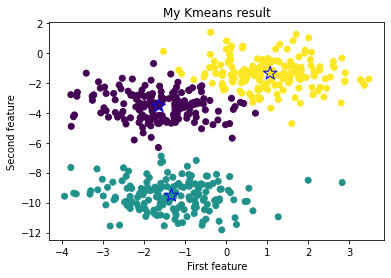

In [5]:
# IN-CLASS CODING: PART D
# Iterate until convergence
# Your codes start here
def mykmeans(data,k,maxiteration = 1000):
    
    labels = np.zeros((len(data), k))

    # Get the start centers location
    centers = startlocation(data, k)
    # 1st iteration
    labels = get_label(data, centers, labels)
    new_centers = get_newcenter(data,k,labels,centers)
    print(centers,new_centers)
    count = 1
    while((new_centers==centers).all() == False) and count < maxiteration:
        
        centers = new_centers
        
        count +=1 
        #######################################
        labels = 9999.9999
        new_centers = 9999.9999
        #######################################
    print("iteration steps: ",count)
    return new_centers,labels


new_centers,labels = mykmeans(X,3,maxiteration = 1000)


plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("My Kmeans result")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.scatter(new_centers[:, 0],
            new_centers[:, 1],
            s=200,
            c=np.arange(len(new_centers)),
            marker='*',
            edgecolors='b')
plt.show()